In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

In [3]:
data_df = pd.read_json("Score_df.json")
data_df.head(3)

,dataset,filename,kf_ease_avg,spache_avg,kf_ease,spache_ease,kf_ease_total_avg,spache_ease_total_avg,plain_utterances,plain_utterances_str
0,English_Bilingual_Grade2_Audio,11221425.cha,102.705322,2.341721,"[103.625, 115.13, 103.54, 116.145, 97.025, 75....","[3.109, 1.826, 1.967, 1.685, 1.403, 1.403, 1.5...",100.527452,2.591364,[the boy and the dog were looking at the frog ...,the boy and the dog were looking at the frog ....
1,English_Bilingual_Grade2_Audio,11222222.cha,108.029452,2.044024,"[117.16, 103.7, 103.0442857143, 101.9821428571...","[1.544, 2.108, 3.0545714286, 2.813, 3.05457142...",106.310333,2.093089,"[the boy went to sleep ., and the frog jumped ...",the boy went to sleep . and the frog jumped ou...
2,English_Bilingual_Grade2_Audio,11222306.cha,103.385723,2.438240,"[103.005, 103.0442857143, 103.7, 115.13, 103.0...","[3.2476666667, 3.0545714286, 2.108, 1.826, 1.8...",100.953344,2.554833,[one night the boy and the dog were looking at...,one night the boy and the dog were looking at ...


In [4]:
grouped_df = data_df.groupby('dataset').describe()
grouped_df

kf_ease_avg                                   \
                                       count        mean       std        min   
dataset                                                                         
English_Bilingual_Grade2_Audio          12.0  104.843785  2.659873  99.970278   
English_Bilingual_Grade2_NoAudio        33.0  104.530155  3.070343  96.007767   
English_Bilingual_Grade5_Audio           7.0  100.496261  2.608377  96.003082   
English_Bilingual_Grade5_NoAudio        47.0  101.045675  3.841589  87.996249   
English_Monolingual_Grade2              19.0  104.223787  5.622205  83.934286   
English_Monolingual_Grade5              29.0  103.843160  2.690424  99.079020   

                                                                      \
                                         25%         50%         75%   
dataset                                                                
English_Bilingual_Grade2_Audio    103.245395  104.225593  107.674846   
English_Bilingual_Grade2_NoAudio  103.155950  104.779628  106.057552   
English_Bilingual_Grade5_Audio     99.311189  100.645713  102.405280   
English_Bilingual_Grade5_NoAudio   99.312477  101.818044  103.538484   
English_Monolingual_Grade2        103.316357  104.589411  106.917925   
English_Monolingual_Grade5        102.418058  103.687221  105.314469   

                                             spache_avg            ...  \
                                         max      count      mean  ...   
dataset                                                            ...   
English_Bilingual_Grade2_Audio    108.664593       12.0  2.144566  ...   
English_Bilingual_Grade2_NoAudio  111.041046       33.0  2.174599  ...   
English_Bilingual_Grade5_Audio    103.392096        7.0  2.556656  ...   
English_Bilingual_Grade5_NoAudio  109.131355       47.0  2.435127  ...   
English_Monolingual_Grade2        111.744751       19.0  2.202065  ...   
English_Monolingual_Grade5        111.244307       29.0  2.341804  ...   

                                 kf_ease_total_avg              \
                                               75%         max   
dataset                                                          
English_Bilingual_Grade2_Audio          104.570261  106.310333   
English_Bilingual_Grade2_NoAudio        104.816477  108.365316   
English_Bilingual_Grade5_Audio          101.945761  102.594906   
English_Bilingual_Grade5_NoAudio        101.831634  106.357842   
English_Monolingual_Grade2              103.834283  109.769692   
English_Monolingual_Grade5              103.765556  108.345523   

                                 spache_ease_total_avg                      \
                                                 count      mean       std   
dataset                                                                      
English_Bilingual_Grade2_Audio                    12.0  2.293698  0.190345   
English_Bilingual_Grade2_NoAudio                  33.0  2.293988  0.214050   
English_Bilingual_Grade5_Audio                     7.0  2.604765  0.260236   
English_Bilingual_Grade5_NoAudio                  47.0  2.540860  0.245930   
English_Monolingual_Grade2                        19.0  2.340891  0.225602   
English_Monolingual_Grade5                        29.0  2.476386  0.275863   

                                                                          \
                                       min       25%       50%       75%   
dataset                                                                    
English_Bilingual_Grade2_Audio    1.964895  2.162901  2.283985  2.440306   
English_Bilingual_Grade2_NoAudio  1.986543  2.120961  2.249201  2.432203   
English_Bilingual_Grade5_Audio    2.163513  2.520293  2.656787  2.668187   
English_Bilingual_Grade5_NoAudio  2.153861  2.415307  2.509815  2.653716   
English_Monolingual_Grade2        1.936027  2.234934  2.323583  2.488718   
English_Monolingual_Grade5        2.012312  2.297929  2.427095  2.688801   

    

In [5]:
def parse_dataset(ds):
    parts = ds.split('_')
    info = {}
    
    # splitting bilinguals from monolinguals
    if 'Bilingual' in parts:
        info['group'] = 'Bilingual'
    elif 'Monolingual' in parts:
        info['group'] = 'Monolingual'
    else:
        info['group'] = 'unknown'

    # Splitting the grades
    if "Grade2" in parts:
        info['grade'] = 2
    elif "Grade5" in parts:
        info['grade'] =  5
    else:
        info['grade'] = np.nan
    
    return pd.Series(info)

meta = data_df['dataset'].apply(parse_dataset)
data_df = pd.concat([data_df, meta], axis=1)

In [13]:
group_df = data_df.groupby(['group', 'grade']).describe()
group_df

kf_ease_avg                                               \
                        count        mean       std        min         25%   
group       grade                                                            
Bilingual   2            45.0  104.613790  2.940138  96.007767  103.155950   
            5            54.0  100.974455  3.689659  87.996249   99.241768   
Monolingual 2            19.0  104.223787  5.622205  83.934286  103.316357   
            5            29.0  103.843160  2.690424  99.079020  102.418058   

                                                      spache_avg            \
                          50%         75%         max      count      mean   
group       grade                                                            
Bilingual   2      104.726395  106.241898  111.041046       45.0  2.166590   
            5      101.696483  103.363678  109.131355       54.0  2.450880   
Monolingual 2      104.589411  106.917925  111.744751       19.0  2.202065   
            5      103.687221  105.314469  111.244307       29.0  2.341804   

                   ... kf_ease_total_avg             spache_ease_total_avg  \
                   ...               75%         max                 count   
group       grade  ...                                                       
Bilingual   2      ...        104.816477  108.365316                  45.0   
            5      ...        101.925081  106.357842                  54.0   
Monolingual 2      ...        103.834283  109.769692                  19.0   
            5      ...        103.765556  108.345523                  29.0   

                                                                               \
                       mean       std       min       25%       50%       75%   
group       grade                                                               
Bilingual   2      2.293911  0.205863  1.964895  2.120961  2.275702  2.432834   
            5      2.549144  0.246231  2.153861  2.419831  2.526393  2.668411   
Monolingual 2      2.340891  0.225602  1.936027  2.234934  2.323583  2.488718   
            5      2.476386  0.275863  2.012312  2.297929  2.427095  2.688801   

                             
                        max  
group       grade            
Bilingual   2      2.833958  
            5      3.375230  
Monolingual 2      2.793641  
            5      2.992515  

[4 rows x 32 columns]

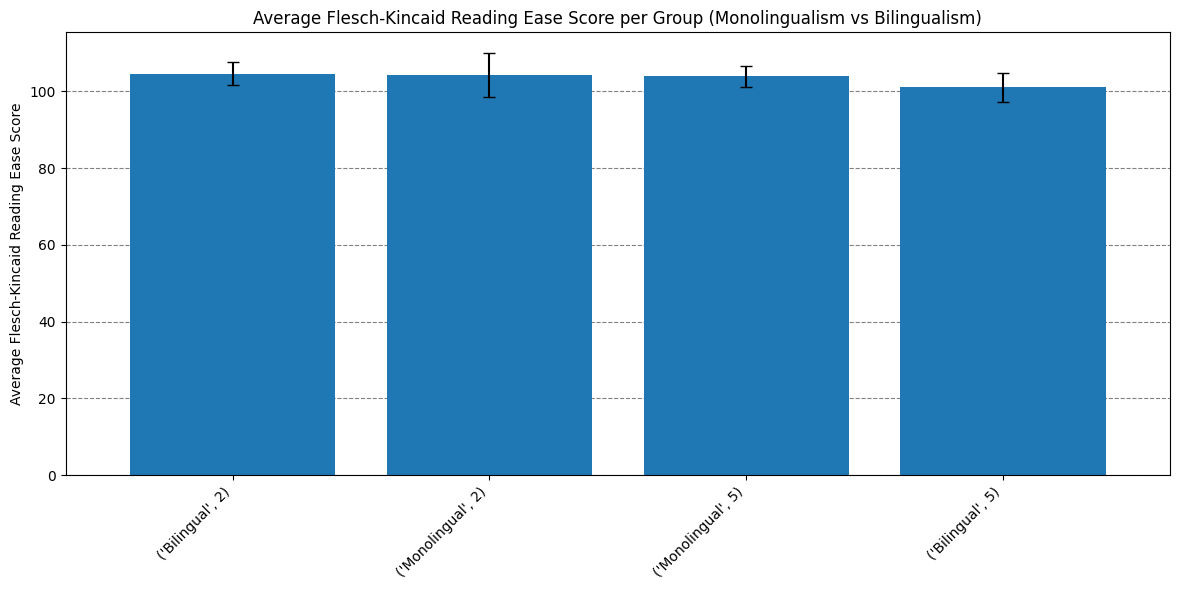

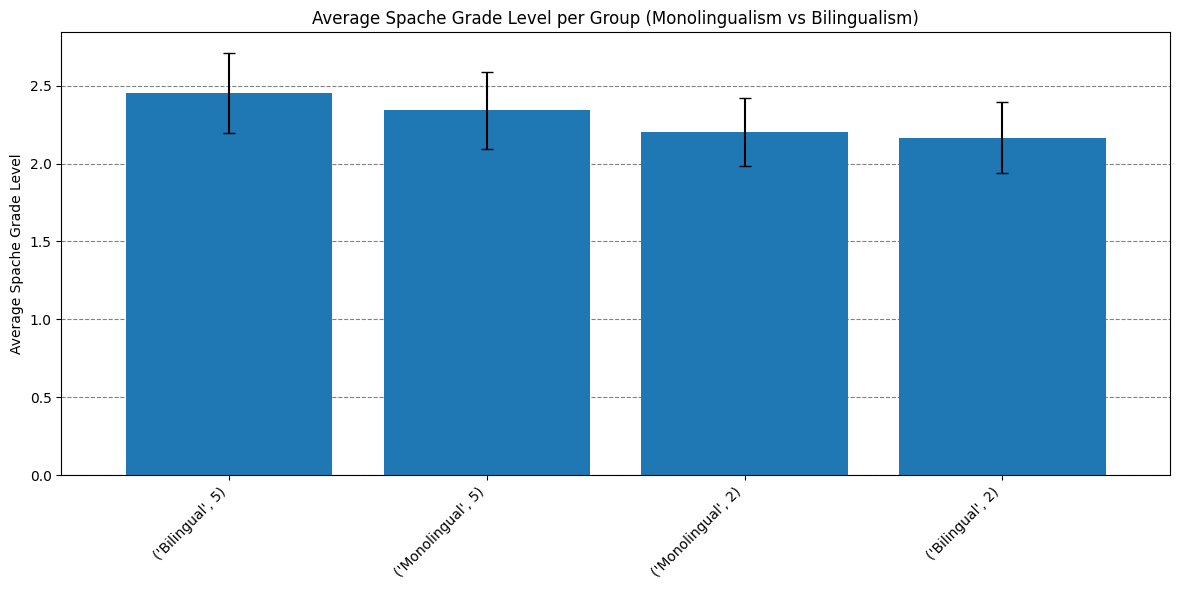

In [ ]:
def make_barplot(df, column_name, ascending=False, title=None, y_label=None):
    means = df[(column_name, 'mean')]
    stds = df[(column_name, 'std')]
    df_plot = pd.DataFrame({'mean': means, 'std': stds}).sort_values('mean', ascending=ascending)

    fig, ax = plt.subplots(figsize=(14,6))
    
    df_plot['mean'].plot(kind='bar', yerr=df_plot['std'], capsize=4, ax=ax, color='C0', label=f'{column_name} (mean ± std)', width=0.8)

    if y_label:
        ax.set_ylabel(y_label)
    else:
        ax.set_ylabel("Spache Grade Level")
    
    if title:
        ax.set_title(title)
    else:
        ax.set_title("Average Spache Grade Level per Dataset")

    ax.set_xlabel("")
    ax.set_xticklabels(df_plot.index, rotation=45, ha='right')

    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


# Sort descending by default (highest mean first). Set ascending=True for lowest-first.

# make_barplot(grouped_df, "kf_ease_avg", ascending=False, title="Average Flesch-Kincaid Reading Ease Score per Dataset", y_label="Average Flesch-Kincaid Reading Ease Score")
# make_barplot(grouped_df, "spache_avg", ascending=False, title="Average Spache Grade Level per Dataset", y_label="Average Spache Grade Level")
make_barplot(group_df, "kf_ease_avg", ascending=False, title="Average Flesch-Kincaid Reading Ease Score per Group (Monolingualism vs Bilingualism)", y_label="Average Flesch-Kincaid Reading Ease Score")
make_barplot(group_df, "spache_avg", ascending=False, title="Average Spache Grade Level per Group (Monolingualism vs Bilingualism)", y_label="Average Spache Grade Level")

In [15]:
data_df.head(2)

,dataset,filename,kf_ease_avg,spache_avg,kf_ease,spache_ease,kf_ease_total_avg,spache_ease_total_avg,plain_utterances,plain_utterances_str,group,grade
0,English_Bilingual_Grade2_Audio,11221425.cha,102.705322,2.341721,"[103.625, 115.13, 103.54, 116.145, 97.025, 75....","[3.109, 1.826, 1.967, 1.685, 1.403, 1.403, 1.5...",100.527452,2.591364,[the boy and the dog were looking at the frog ...,the boy and the dog were looking at the frog ....,Bilingual,2
1,English_Bilingual_Grade2_Audio,11222222.cha,108.029452,2.044024,"[117.16, 103.7, 103.0442857143, 101.9821428571...","[1.544, 2.108, 3.0545714286, 2.813, 3.05457142...",106.310333,2.093089,"[the boy went to sleep ., and the frog jumped ...",the boy went to sleep . and the frog jumped ou...,Bilingual,2


# T-Test Code

In [16]:
bilingual_kf_ease_2 = []
bilingual_spache_ease_2 = []
monolingual_kf_ease_2 = []
monolingual_spache_ease_2 = []

bilingual_kf_ease_5 = []
bilingual_spache_ease_5 = []
monolingual_kf_ease_5 = []
monolingual_spache_ease_5 = []

for x in range(len(data_df)):
    if data_df['group'][x] == "Bilingual" and data_df['grade'][x] == 2:
        for y in data_df['kf_ease'][x]:
            bilingual_kf_ease_2.append(y)
        for y in data_df['spache_ease'][x]:
            bilingual_spache_ease_2.append(y)
    elif data_df['group'][x] == "Monolingual" and data_df['grade'][x] == 2:
        for y in data_df['kf_ease'][x]:
            monolingual_kf_ease_2.append(y)
        for y in data_df['spache_ease'][x]:
            monolingual_spache_ease_2.append(y)
    elif data_df['group'][x] == "Bilingual" and data_df['grade'][x] == 5:
        for y in data_df['kf_ease'][x]:
            bilingual_kf_ease_5.append(y)
        for y in data_df['spache_ease'][x]:
            bilingual_spache_ease_5.append(y)
    elif data_df['group'][x] == "Monolingual" and data_df['grade'][x] == 5:
        for y in data_df['kf_ease'][x]:
            monolingual_kf_ease_5.append(y)
        for y in data_df['spache_ease'][x]:
            monolingual_spache_ease_5.append(y)

In [ ]:
ttest_ind(bilingual_kf_ease_2, monolingual_kf_ease_2), ttest_ind(bilingual_kf_ease_5, monolingual_kf_ease_5), ttest_ind(bilingual_spache_ease_2, monolingual_spache_ease_2), ttest_ind(bilingual_spache_ease_5, monolingual_spache_ease_5)

# Grade 5 Kincaid-Flesch Reading Ease is statistically significant
# Grade 5 Spache is almost significnat but not enough
# Grade 2 definitely neither score is significant.

(Ttest_indResult(statistic=-0.7954415594571053, pvalue=0.42643824162124244),
 Ttest_indResult(statistic=-4.803364947869521, pvalue=1.6475379737888148e-06),
 Ttest_indResult(statistic=-0.8137708343562627, pvalue=0.4158599376124119),
 Ttest_indResult(statistic=2.3989231286430686, pvalue=0.016512400999168352))

# SilvaCorvalen testing

In [139]:
# filter rows where dataset equals 'English_SilvaCorvalen'
ds_silva = data_df[data_df['dataset'] == 'English_SilvaCorvalen']
ds_silva = ds_silva.copy()
ds_silva['is_frog'] = ds_silva['filename'].str.contains('frog', case=False, na=False)

grouped_by_frog = ds_silva.groupby('is_frog').agg(
    n_files=('filename', 'size'),
    mean_kf=('kf_ease_avg', 'mean'),
    std_kf=('kf_ease_avg', 'std'),
    mean_spache=('spache_avg', 'mean'),
    std_spache=('spache_avg', 'std')
)

print(grouped_by_frog)

         n_files    mean_kf    std_kf  mean_spache  std_spache
is_frog                                                       
False         11  94.350705  3.236905     2.593937    0.230703
True           6  96.999645  4.243707     2.642522    0.494280
